# **시간 변화에 따른 콩온도 예측 LSTM Modeling**
데이터 간단히 살펴보고 모델링 생성 및 Test 실행하기

## **Pytorch 학습모델 활용**
Coffee 의 Temperature 예측하는 모델링 만들기

In [6]:
# 데이터 불러오기
from model.snoopers import load_excel
price, data, scaler = load_excel('./data/coffeedata.xlsx')
data.head()

/home/buffet/Coding/Python/Pytorch/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,air,gas,gasgap,gram,bean
0,196,10,10,80,179
1,195,10,10,80,177
2,195,10,10,80,176
3,193,10,10,80,173
4,192,10,10,80,171


In [2]:
# 데이터 전처리 및 모델의 활용
from model.snoopers import split_data, lstm_pytorch_model
X, y = split_data(price, lookback = 60)
model = lstm_pytorch_model('./model/coffee.pth')
model.eval()

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [7]:
# CSV 파일로 저장하기
file_csv = 'bean_lstm.csv'

# 데이터로 예측 데이터 학습 및 결과값 출력
from model.snoopers import r2_score_and_save_csv
y_pred = model(X)
lstm_predict, predict, original = r2_score_and_save_csv(y, y_pred, scaler, data)
lstm_predict.to_csv(file_csv, index=None)
print(f"결과값을 {file_csv} 파일로 저장하였습니다.")
lstm_predict.tail()

r2_score is : 0.9903256085226195


,air,gas,gasgap,gram,bean,lstm
20184,249,90,40,800,219,217.821106
20185,249,90,40,800,220,217.944443
20186,249,90,40,800,220,218.024628
20187,250,90,40,800,220,218.215454
20188,250,90,40,800,220,218.418716


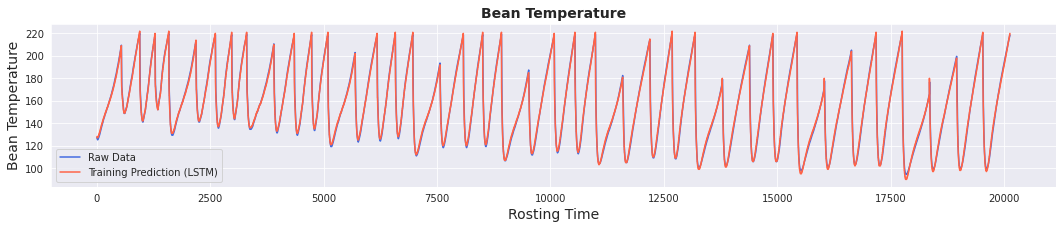

In [8]:
%matplotlib inline
# 결과값 시각화 출력하기
from model.snoopers import plot_data
plot_data(predict, original)